In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


It is recommended to scale the values for PCA

In [4]:
sc = StandardScaler()
# array
x = iris.iloc[:,0:4].values
x = sc.fit_transform(x)

In [5]:
# 3 principal components
pca = decomposition.PCA(3)
x = pca.fit_transform(x)

In [6]:
xdf = pd.DataFrame(data = x)
df = pd.concat([xdf,iris['species']],axis=1)

In [7]:
df


,0,1,2,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


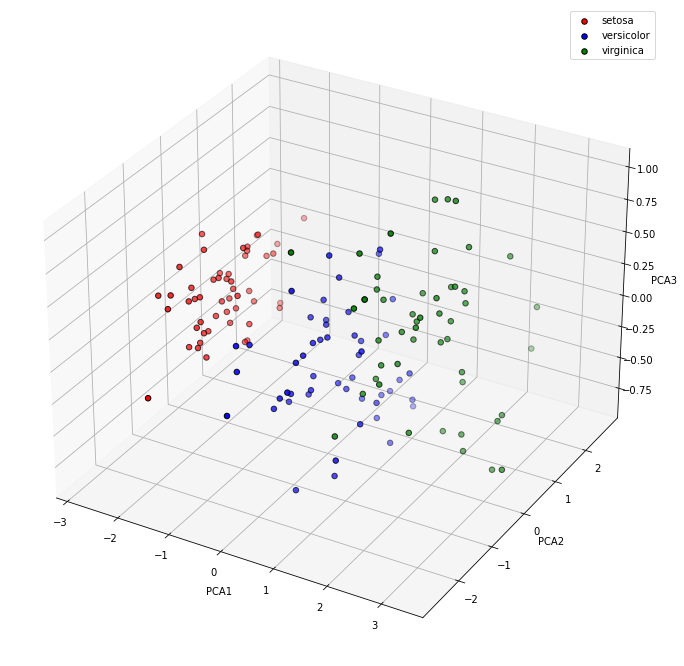

In [8]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
col = ['r','b','g']
target = iris.species.unique()
for C, t in zip(col, target):
    fdf = df[df['species']==t]
    x=np.array(fdf.iloc[:,0])
    y=np.array(fdf.iloc[:,1])
    z=np.array(fdf.iloc[:,2])

    ax.scatter3D(x, y, z,edgecolor='k', c = C,s=30)

ax.legend(target)
